In [1]:
## Importing necessary libraries

import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectKBest, mutual_info_classif, f_classif
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier, VotingClassifier, AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.linear_model import Perceptron
from sklearn.metrics import accuracy_score
from sklearn.pipeline import Pipeline
from xgboost import XGBClassifier

In [33]:
### Loading the modified dataset

df = pd.read_csv('merged.csv')
df.columns

Index(['id', 'acousticness', 'danceability', 'duration_ms', 'energy',
       'explicit', 'instrumentalness', 'liveness', 'loudness', 'popularity',
       'speechiness', 'tempo', 'valence', 'year', 'key_0', 'key_1', 'key_2',
       'key_3', 'key_4', 'key_5', 'key_6', 'key_7', 'key_8', 'key_9', 'key_10',
       'key_11', 'minor', 'major', 'acousticness_ar', 'danceability_ar',
       'duration_ms_ar', 'energy_ar', 'instrumentalness_ar', 'liveness_ar',
       'loudness_ar', 'speechiness_ar', 'tempo_ar', 'valence_ar',
       'popularity_ar', 'count', 'key_0_ar', 'key_1_ar', 'key_2_ar',
       'key_3_ar', 'key_4_ar', 'key_5_ar', 'key_6_ar', 'key_7_ar', 'key_8_ar',
       'key_9_ar', 'key_10_ar', 'key_11_ar', 'minor_ar', 'major_ar',
       'acousticness_yr', 'danceability_yr', 'duration_ms_yr', 'energy_yr',
       'instrumentalness_yr', 'liveness_yr', 'loudness_yr', 'speechiness_yr',
       'tempo_yr', 'valence_yr', 'popularity_yr', 'mode', 'key_0_yr',
       'key_1_yr', 'key_2_yr', 'key_3_yr

In [34]:
df.shape

(172230, 73)

In [35]:
del df['mode']  ## Deleted unnecessary attributes
del df['key_6_yr']
del df['loudness']
del df['id']

In [36]:
## Dropping the "popularity" attribute from the data frame and declaring it as the dependent variable or the output
X = df[df.columns.difference(['popularity'])]
y = pd.cut(x=df["popularity"], bins=[-1,42,100], labels=[0,1])

In [37]:
### Standardizing the data and splitting it into training and testing sets

input_scaler = StandardScaler()
X_normalized = input_scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(
    X_normalized, y, test_size=0.30, random_state=42, stratify=y
)

In [38]:
### SVM with pipeline

scaler = StandardScaler()
## Hyperparameters are tuned according to gridsearch results
svm = SVC(kernel='rbf', random_state=42, probability = True)

svm_pipe = Pipeline([('scaler', scaler), ('svm', svm)])

In [39]:
### Logistic Regressor with pipeline

## Hyperparameters are tuned according to gridsearch results
select = SelectKBest(f_classif, k=27)
log_clf = LogisticRegression(random_state=42)

log_pipe = Pipeline([('select', select), ('log_clf', log_clf)])

In [40]:
### Decision Tree Classifier with pipeline

## Hyperparameters are tuned according to gridsearch results
tree_clf = DecisionTreeClassifier(max_depth=10, max_features='auto', criterion='gini', min_samples_leaf=1,
                               min_samples_split=12)
tree_pipe = Pipeline([('tree_clf',tree_clf)])

In [41]:
### Perceptron with pipeline

## Hyperparameters are tuned according to gridsearch results
ppn_clf = Perceptron(random_state=0, eta0=1, max_iter=10000)

ppn_pipe = Pipeline([('ppn_clf',ppn_clf)])

In [42]:
### AdaBoost with pipeline

## Hyperparameters are tuned according to gridsearch results
ada_clf = AdaBoostClassifier(random_state=42)

ada_pipe = Pipeline([('ada_clf', ada_clf)])

In [43]:
### XGBoost with pipeline

## Hyperparameters are tuned according to gridsearch results
xgb_clf = XGBClassifier(random_state=42)

xgb_pipe = Pipeline([('xgb_clf', xgb_clf)])

In [44]:
from sklearn.model_selection import GridSearchCV

# Define parameter grids for all the models
#svm_params = {'C': [0.1, 1, 10], 'gamma': [1, 0.1, 0.01]}
log_params = {'C': [0.1, 1, 10]}
tree_params = {'max_depth': [5, 10, 15], 'min_samples_split': [2, 5, 10]}
ada_params = {'n_estimators': [50, 100, 200], 'learning_rate': [0.01, 0.1, 1]}
xgb_params = {'n_estimators': [50, 100, 200], 'learning_rate': [0.01, 0.1, 1], 'max_depth': [3, 5, 7]}
ppn_params = {'eta0': [0.1, 1, 10]}

In [45]:
# Perform Grid Search for all the models
#svm_gs = GridSearchCV(svm, svm_params, cv=5)
log_gs = GridSearchCV(log_clf, log_params, cv=5)
tree_gs = GridSearchCV(tree_clf, tree_params, cv=5)
ada_gs = GridSearchCV(ada_clf, ada_params, cv=5)
xgb_gs = GridSearchCV(xgb_clf, xgb_params, cv=5)
ppn_gs = GridSearchCV(ppn_clf, ppn_params, cv=5)

In [46]:
# Fit the Grid Search objects on the training data
#svm_gs.fit(X_train, y_train)
log_gs.fit(X_train, y_train)
tree_gs.fit(X_train, y_train)
ada_gs.fit(X_train, y_train)
xgb_gs.fit(X_train, y_train)
ppn_gs.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

GridSearchCV(cv=5, estimator=Perceptron(eta0=1, max_iter=10000),
             param_grid={'eta0': [0.1, 1, 10]})

In [47]:
# Get the best estimators
#svm_best = svm_gs.best_estimator_
log_best = log_gs.best_estimator_
tree_best = tree_gs.best_estimator_
ada_best = ada_gs.best_estimator_
xgb_best = xgb_gs.best_estimator_
ppn_best = ppn_gs.best_estimator_

In [48]:
# Update your pipelines with the best estimators
#svm_pipe = Pipeline([('scaler', scaler), ('svm', svm_best)])
log_pipe = Pipeline([('select', select), ('log_clf', log_best)])
tree_pipe = Pipeline([('tree_clf', tree_best)])
ada_pipe = Pipeline([('ada_clf', ada_best)])
xgb_pipe = Pipeline([('xgb_clf', xgb_best)])
ppn_pipe = Pipeline([('ppn_clf', ppn_best)])

In [49]:
# Update your Voting Classifier
vote_clf = VotingClassifier(estimators=[('tree_pipe', tree_pipe), ('log_pipe', log_pipe), ('ppn_pipe', ppn_pipe), ('ada_pipe', ada_pipe), ('xgb_pipe', xgb_pipe)],
                         voting='hard', n_jobs=-1)

In [50]:
# Fit the Voting Classifier on the training data
vote_clf.fit(X_train, y_train)

VotingClassifier(estimators=[('tree_pipe',
                              Pipeline(steps=[('tree_clf',
                                               DecisionTreeClassifier(max_depth=10,
                                                                      max_features='auto',
                                                                      min_samples_split=5))])),
                             ('log_pipe',
                              Pipeline(steps=[('select', SelectKBest(k=27)),
                                              ('log_clf',
                                               LogisticRegression(C=0.1,
                                                                  random_state=42))])),
                             ('ppn_pipe',
                              Pipeline(steps=[('ppn_clf',
                                               Perceptron(eta0=0.1,
                                                          max_iter=10000))])),
                             ('ada_...
                                                             grow_policy=None,
                                                             importance_type=None,
                                                             interaction_constraints=None,
                                                             learning_rate=0.1,
                                                             max_bin=None,
                                                             max_cat_threshold=None,
                                                             max_cat_to_onehot=None,
                                                             max_delta_step=None,
                                                             max_depth=7,
                                                             max_leaves=None,
                                                             min_child_weight=None,
                                                             missing=nan,
                                                             monotone_constraints=None,
                                                             multi_strategy=None,
                                                             n_estimators=200,
                                                             n_jobs=None,
                                                             num_parallel_tree=None,
                                                             random_state=42, ...))]))],
                 n_jobs=-1)

In [51]:
# Make predictions and evaluate the model
y_pred = vote_clf.predict(X_test)
print("Accuracy: ", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

Accuracy:  0.8891985523234435
Confusion Matrix:
 [[37299  1512]
 [ 4213  8645]]
Classification Report:
               precision    recall  f1-score   support

           0       0.90      0.96      0.93     38811
           1       0.85      0.67      0.75     12858

    accuracy                           0.89     51669
   macro avg       0.87      0.82      0.84     51669
weighted avg       0.89      0.89      0.88     51669



In [52]:
from sklearn.metrics import roc_curve, auc

In [55]:
# Calculating ROC curve and ROC area
fpr, tpr, _ = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)

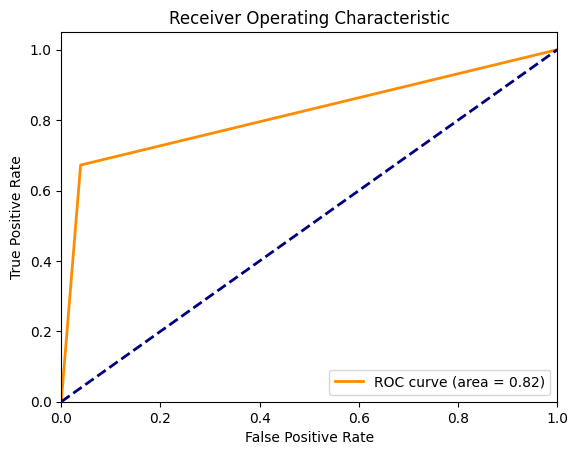

In [56]:
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()